# Preprocessing and EDA

In [2]:
# Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1. Basic cleaning

In [129]:
# Read data frame
data = pd.read_csv('strokedata.csv', encoding = 'utf-8')
data = data.drop('id', axis=1)  # drop id column

# Convert binary categorical variables to dummy variables
data = data[(data.gender=='Male')|(data.gender=='Female')] # drop only gender = other obs
data['gender'] = np.where(data['gender'] == 'Male', 1, 0)
data['ever_married'] = np.where(data['ever_married'] == 'Yes', 1, 0)
data['Residence_type'] = np.where(data['Residence_type'] == 'Urban', 1, 0)
data = data.rename({'Residence_type':'urban_home'}, axis=1)  # Rename column

# Drop NAs
print('Dropping missing values:\n{}'.format(data.isnull().sum()[data.isnull().sum() > 0]))
data = data.dropna().reset_index(drop=True)
data

Dropping missing values:
bmi    201
dtype: int64


,gender,age,hypertension,heart_disease,ever_married,work_type,urban_home,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
2,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
3,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
4,1,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4903,0,13.0,0,0,0,children,0,103.08,18.6,Unknown,0
4904,0,81.0,0,0,1,Self-employed,1,125.20,40.0,never smoked,0
4905,0,35.0,0,0,1,Self-employed,0,82.99,30.6,never smoked,0
4906,1,51.0,0,0,1,Private,0,166.29,25.6,formerly smoked,0


## 2. Summary statistics and plots

In [130]:
sns.set(style="whitegrid")

# define variable types
cont_vars = data[['age', 'avg_glucose_level', 'bmi']]
binary_vars = data[['ever_married', 'urban_home', 'gender', 'hypertension', 'heart_disease']]
cat_vars = data[['smoking_status', 'work_type']]

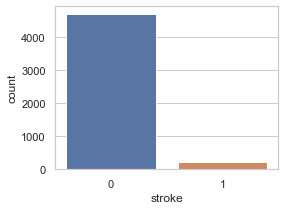

In [131]:
# Countplot of target variable
fig = plt.figure(figsize=(4,3))
sns.countplot(x='stroke', data=data)
plt.show()

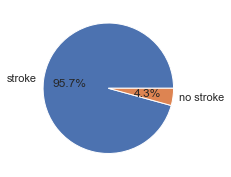

In [152]:
# Countplot of target variable
fig = plt.figure(figsize=(4,3))
plt.pie(x=data.stroke.value_counts(), labels=['stroke', 'no stroke'], autopct='%1.1f%%')
plt.show()

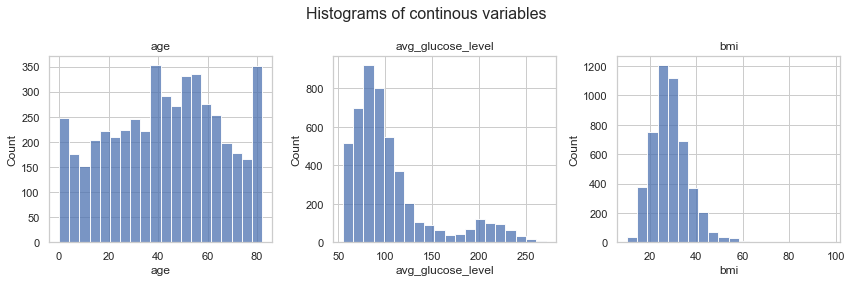

In [132]:
# plot histogram of all continous columns
fig, axs = plt.subplots(1, 3, figsize=(12,4))
for i, col in enumerate(cont_vars.columns):
    sns.histplot(ax=axs[i], x=col, data=data, bins=20)
    axs[i].set_title(col)
fig.suptitle('Histograms of continous variables', fontsize=16)
plt.tight_layout()
plt.show()

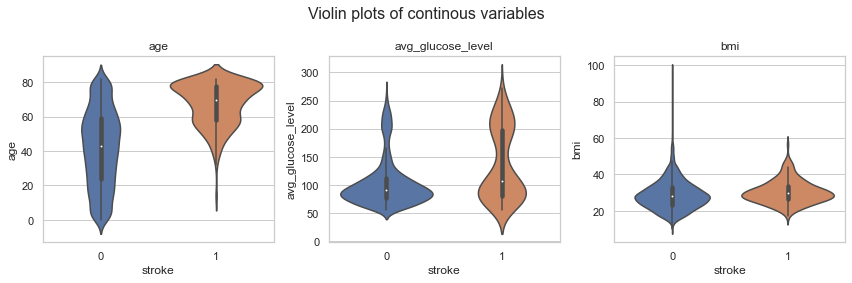

In [133]:
# plot boxplot of all continous columns
fig, axs = plt.subplots(1, 3, figsize=(12,4))
for i, col in enumerate(cont_vars.columns):
    sns.violinplot(ax=axs[i], y=col, x='stroke', data=data)
    axs[i].set_title(col)
fig.suptitle('Violin plots of continous variables', fontsize=16)
plt.tight_layout()
plt.show()

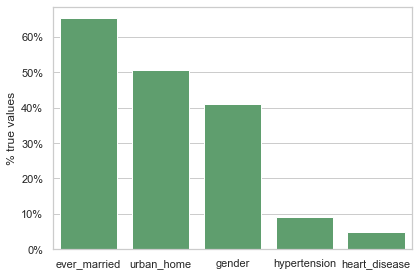

In [143]:
binary_perc = binary_vars.sum()/len(binary_vars)*100
sns.barplot(x=binary_perc.index, y=binary_perc, color='g')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:}%'.format(int(y))))
#plt.ylim(0,100)
plt.ylabel('% true values')
plt.tight_layout()
plt.show()

In [174]:
binary_vars_grp = binary_vars.groupby(data.stroke).sum().T
print(binary_vars_grp)

stroke            0    1
ever_married   3018  186
urban_home     2381  109
gender         1922   89
hypertension    391   60
heart_disease   203   40


IndexError: iloc cannot enlarge its target object

In [166]:
binary_perc = 
print(binary_perc)
sns.barplot(x=binary_perc.columns, y=binary_perc.values, hue=binary_perc.index, color='g')

        ever_married  urban_home     gender  hypertension  heart_disease
stroke                                                                  
0          61.491443   48.512632  39.160554      7.966585       4.136104
1           3.789731    2.220864   1.813366      1.222494       0.814996


ValueError: Data must be 1-dimensional

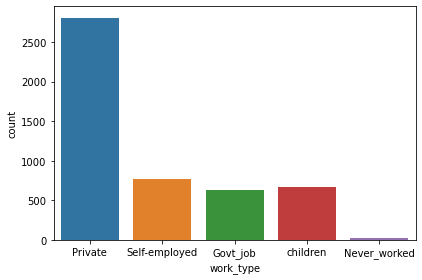

In [24]:
sns.countplot(x='work_type', data=data)
plt.tight_layout()
plt.show()